Project 1 : Cardiovascular Disease Prediction

Heart disease, also known as cardiovascular disease, is one of the most serious illnesses in both India and the rest of the globe. According to estimates, cardiac illnesses account for 28.1% of fatalities. More than 17.6 million fatalities, or a large portion of all deaths in 2016, were caused by it in 2016. Therefore, a system that can predict with exact precision and dependability is required for the appropriate and prompt diagnosis as well as the treatment of such diseases. Numerous academics do extensive research utilising a variety of machine learning algorithms to predict heart illness using different datasets that contain numerous factors that lead to heart attacks. Now it is your turn to do a analysis with the given dataset.


Project Output Instructions :
    • Perform data pre-processing operations.
    • As a part of data analysis and visualizations draw all the possible plots to provide essential informations and to derive some meaningful insights.
    • Show your correlation matrix of features according to the datasets.
    • Find out accuracy levels of various machine learning techniques such as Support Vector Machines (SVM), K-Nearest Neighbor (KNN), Decision Trees (DT) , Logistic Regression (LR) and Random Forest (RF).
    • Build your Machine learning model for heart disease detection according to the result.



Cleaned Data Shape: (68583, 11)


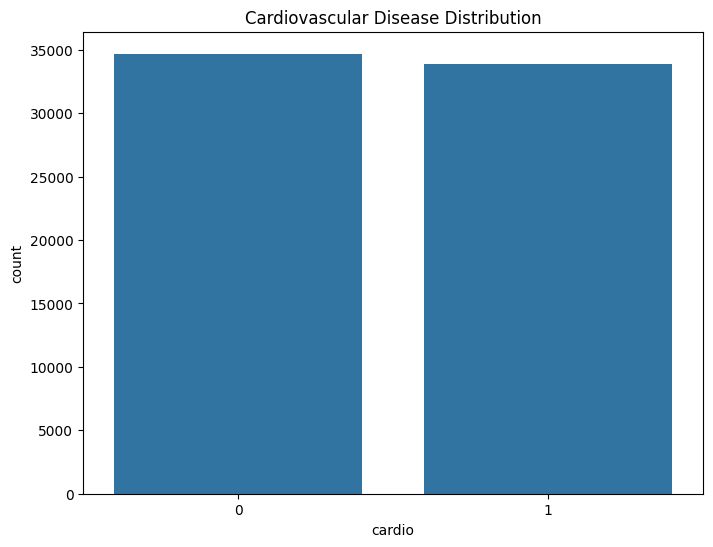

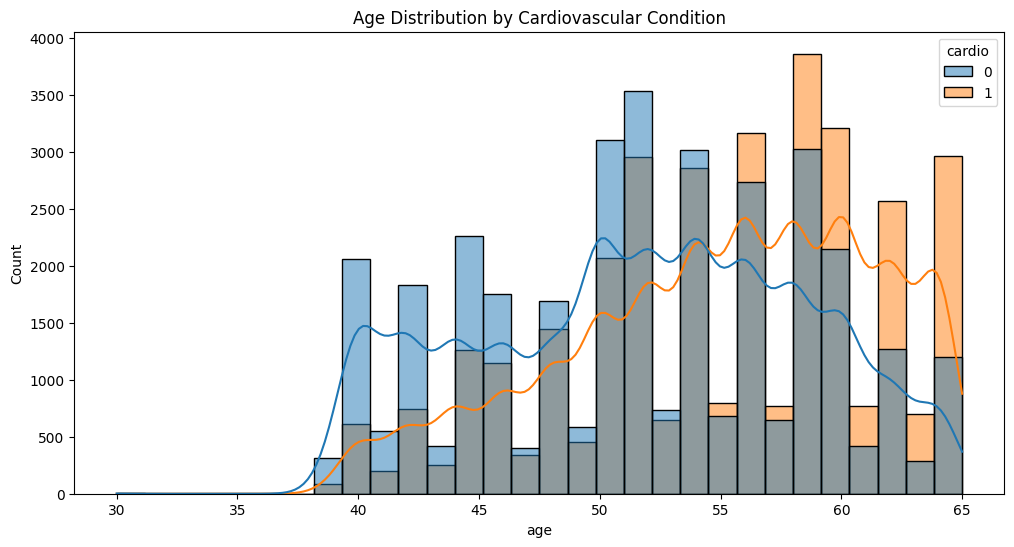

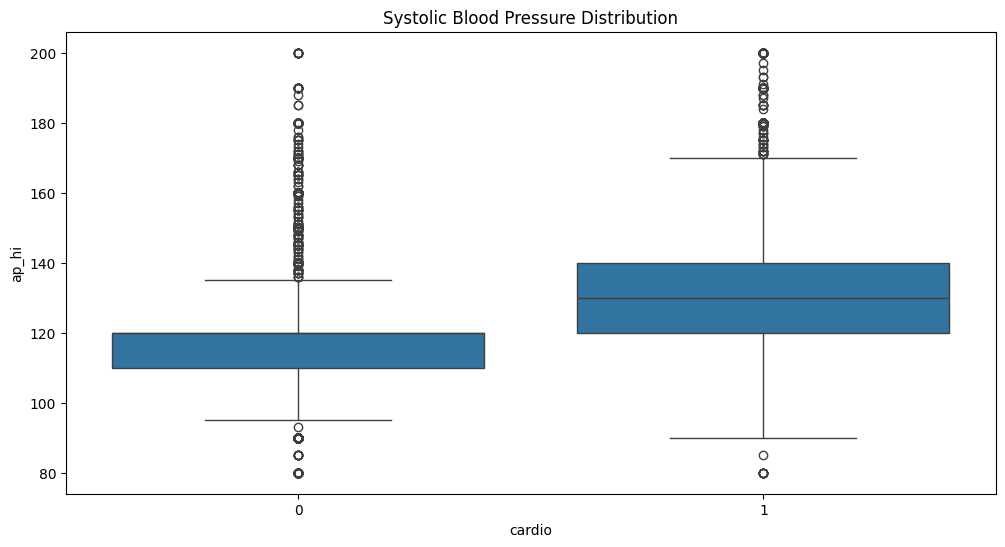

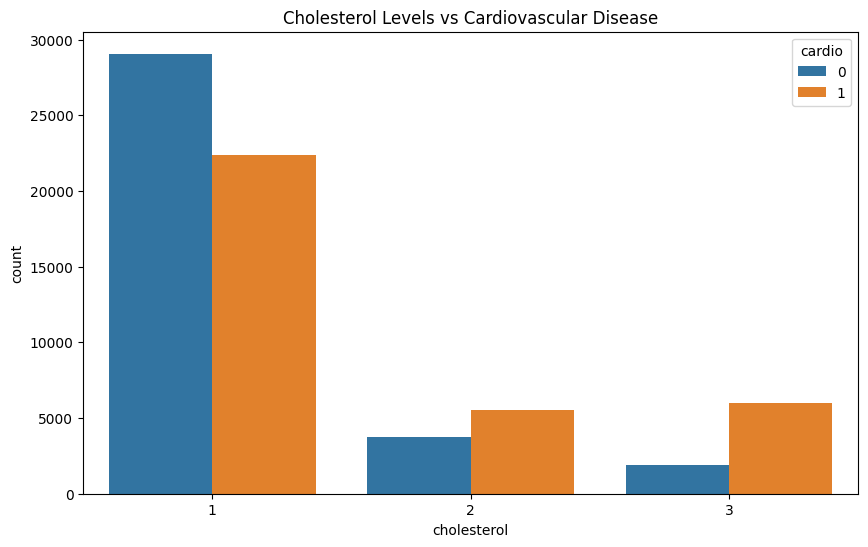

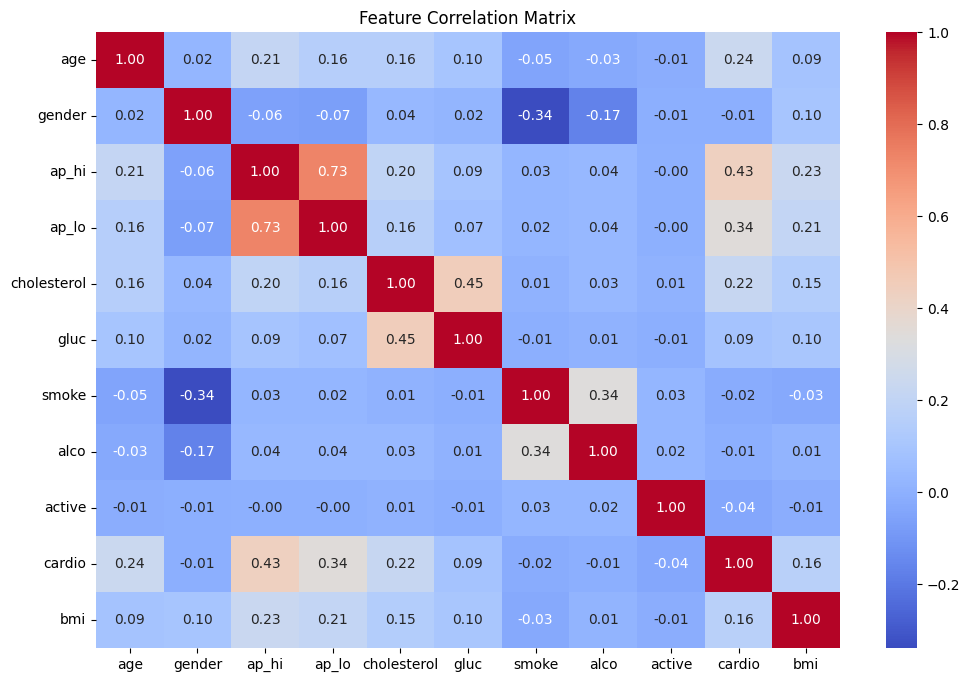


Model Performance Comparison:


,Accuracy,Precision,Recall,F1-Score,AUC-ROC
SVM,0.738129,0.740493,0.738129,0.737051,0.736963
KNN,0.699684,0.699643,0.699684,0.699639,0.699455
Decision Tree,0.640535,0.640450,0.640535,0.640363,0.640124
Logistic Regression,0.733998,0.736178,0.733998,0.732948,0.732856
Random Forest,0.685930,0.686086,0.685930,0.685959,0.685975



Best Model: SVM
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76     10487
           1       0.76      0.68      0.72     10088

    accuracy                           0.74     20575
   macro avg       0.74      0.74      0.74     20575
weighted avg       0.74      0.74      0.74     20575



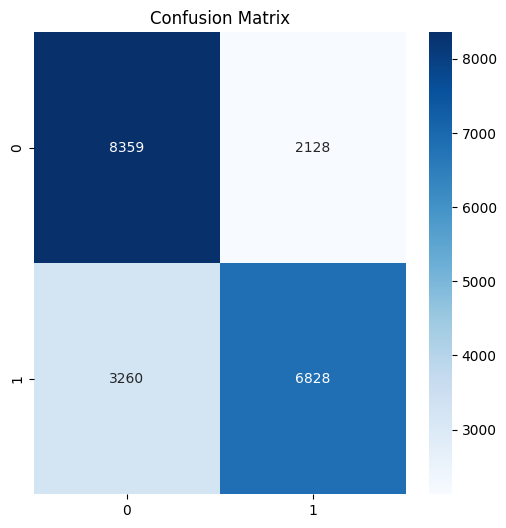

In [2]:
# %% [markdown]
# # Cardiovascular Disease Prediction Project

# %% [markdown]
# ## 1. Data Preprocessing

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, 
                             confusion_matrix, roc_auc_score)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv('./cardio_train.csv', sep=';')

# Data Cleaning
# Convert age from days to years
df['age'] = (df['age']/365).round().astype(int)

# Convert gender to binary (2-female to 0)
df['gender'] = df['gender'].replace({2:0})

# Calculate BMI
df['bmi'] = df['weight']/((df['height']/100)**2)

# Handle blood pressure outliers
df = df[(df['ap_hi'] >= 80) & (df['ap_hi'] <= 200)]
df = df[(df['ap_lo'] >= 40) & (df['ap_lo'] <= 120)]
df = df[df['ap_hi'] > df['ap_lo']]

# Drop unnecessary columns
df.drop(['id', 'height', 'weight'], axis=1, inplace=True)

# Check cleaned data
print("Cleaned Data Shape:", df.shape)
df.head()

# %% [markdown]
# ## 2. Data Analysis & Visualizations

# %%
# Target Distribution
plt.figure(figsize=(8,6))
sns.countplot(x='cardio', data=df)
plt.title('Cardiovascular Disease Distribution')
plt.show()

# %%
# Age Analysis
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='age', hue='cardio', bins=30, kde=True)
plt.title('Age Distribution by Cardiovascular Condition')
plt.show()

# %%
# Blood Pressure Analysis
plt.figure(figsize=(12,6))
sns.boxplot(x='cardio', y='ap_hi', data=df)
plt.title('Systolic Blood Pressure Distribution')
plt.show()

# %%
# Cholesterol Analysis
plt.figure(figsize=(10,6))
sns.countplot(x='cholesterol', hue='cardio', data=df)
plt.title('Cholesterol Levels vs Cardiovascular Disease')
plt.show()

# %%
# Correlation Matrix
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# %% [markdown]
# ## 3. Machine Learning Implementation

# %%
# Prepare Data
X = df.drop('cardio', axis=1)
y = df['cardio']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Models
models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier()
}

# Model Training & Evaluation
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision'],
        'Recall': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall'],
        'F1-Score': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score'],
        'AUC-ROC': roc_auc_score(y_test, y_pred)
    }

# Display Results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
display(results_df)

# %% [markdown]
# ## 4. Best Model Selection & Final Implementation

# %%
# Select best model
best_model_name = results_df['AUC-ROC'].idxmax()
best_model = models[best_model_name]

# Final Model Evaluation
print(f"\nBest Model: {best_model_name}")
print("Classification Report:")
print(classification_report(y_test, best_model.predict(X_test_scaled)))

# Feature Importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    plt.figure(figsize=(10,6))
    feature_imp = pd.Series(best_model.feature_importances_, index=X.columns)
    feature_imp.nlargest(10).plot(kind='barh')
    plt.title('Feature Importance')
    plt.show()

# Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, best_model.predict(X_test_scaled)), 
            annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()